<h1> Estimating CO2 emission of a new car using regression <h1>

## downloading the data set

In [ ]:
!wget - O FuelConsumption.csv https: // s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv


<h2 id="understanding_data">Understanding the Data</h2>

### `FuelConsumption.csv`:
We have downloaded a fuel consumption dataset, **`FuelConsumption.csv`**, which contains model-specific fuel consumption ratings and estimated carbon dioxide emissions for new light-duty vehicles for retail sale in Canada. [Dataset source](http://open.canada.ca/data/en/dataset/98f1a129-f628-4ce4-b24d-6f16bf24dd64)

- **MODELYEAR** e.g. 2014
- **MAKE** e.g. Acura
- **MODEL** e.g. ILX
- **VEHICLE CLASS** e.g. SUV
- **ENGINE SIZE** e.g. 4.7
- **CYLINDERS** e.g 6
- **TRANSMISSION** e.g. A6
- **FUELTYPE** e.g. z
- **FUEL CONSUMPTION in CITY(L/100 km)** e.g. 9.9
- **FUEL CONSUMPTION in HWY (L/100 km)** e.g. 8.9
- **FUEL CONSUMPTION COMB (L/100 km)** e.g. 9.2
- **CO2 EMISSIONS (g/km)** e.g. 182   --> low --> 0


## required packages

In [1]:
from matplotlib import numpy as np, pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold, train_test_split
from sklearn.metrics import r2_score, accuracy_score
import seaborn as sns
import funcs  # local package
%matplotlib inline

## initialize

In [2]:
df = pd.read_csv(
    r'C:/Users/thisi/OneDrive/GitHub/Machine-learning-master/Regression/Linear/Data/FuelConsumption.csv')
df = df.dropna()

## take a look at  the dataset.

In [3]:
df.head(5)

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [4]:
# show keys
print(df.keys())

Index(['MODELYEAR', 'MAKE', 'MODEL', 'VEHICLECLASS', 'ENGINESIZE', 'CYLINDERS',
       'TRANSMISSION', 'FUELTYPE', 'FUELCONSUMPTION_CITY',
       'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB',
       'FUELCONSUMPTION_COMB_MPG', 'CO2EMISSIONS'],
      dtype='object')


In [5]:
df.shape

(1067, 13)

In [6]:
for fea in df.columns:
    print('{} unique:\n{}\n\n\n'.format(fea, df[fea].unique()))

MODELYEAR unique:
[2014]



MAKE unique:
['ACURA' 'ASTON MARTIN' 'AUDI' 'BENTLEY' 'BMW' 'BUICK' 'CADILLAC'
 'CHEVROLET' 'CHRYSLER' 'DODGE' 'FIAT' 'FORD' 'GMC' 'HONDA' 'HYUNDAI'
 'INFINITI' 'JAGUAR' 'JEEP' 'KIA' 'LAMBORGHINI' 'LAND ROVER' 'LEXUS'
 'LINCOLN' 'MASERATI' 'MAZDA' 'MERCEDES-BENZ' 'MINI' 'MITSUBISHI' 'NISSAN'
 'PORSCHE' 'RAM' 'ROLLS-ROYCE' 'SCION' 'SMART' 'SRT' 'SUBARU' 'TOYOTA'
 'VOLKSWAGEN' 'VOLVO']



MODEL unique:
['ILX' 'ILX HYBRID' 'MDX 4WD' 'RDX AWD' 'RLX' 'TL' 'TL AWD' 'TSX' 'DB9'
 'RAPIDE' 'V8 VANTAGE' 'V8 VANTAGE S' 'VANQUISH' 'A4' 'A4 QUATTRO'
 'A5 CABRIOLET QUATTRO' 'A5 QUATTRO' 'A6 QUATTRO'
 'A6 QUATTRO TDI CLEAN DIESEL' 'A7 QUATTRO' 'A7 QUATTRO TDI CLEAN DIESEL'
 'A8' 'A8 TDI CLEAN DIESEL' 'A8L' 'A8L TDI CLEAN DIESEL' 'ALLROAD QUATTRO'
 'Q5' 'Q5 HYBRID' 'Q5 TDI CLEAN DIESEL' 'Q7' 'Q7 TDI CLEAN DIESEL' 'R8'
 'R8 SPYDER' 'RS5' 'RS5 CABRIOLET' 'RS7' 'S4' 'S5' 'S5 CABRIOLET' 'S6'
 'S7' 'S8' 'SQ5' 'TT COUPE QUATTRO' 'TT ROADSTER QUATTRO'
 'TTS COUPE QUATTRO' 'TTS ROA

#### Let's expand the model year to the range of 2014 to 2020

In [7]:
df['MODELYEAR'].iloc[np.random.randint(
    0, 1067, 700)] = np.random.choice([2015, 2016, 2017, 2018, 2019, 2020], 700)
df['MODELYEAR'].unique()

C:\Users\thisi\anaconda3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


array([2015, 2014, 2019, 2020, 2016, 2017, 2018], dtype=int64)

### plotting 

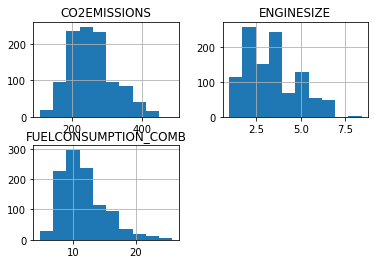

In [8]:
x = df[['ENGINESIZE', 'CO2EMISSIONS', 'FUELCONSUMPTION_COMB']]
x.hist()
plt.show()

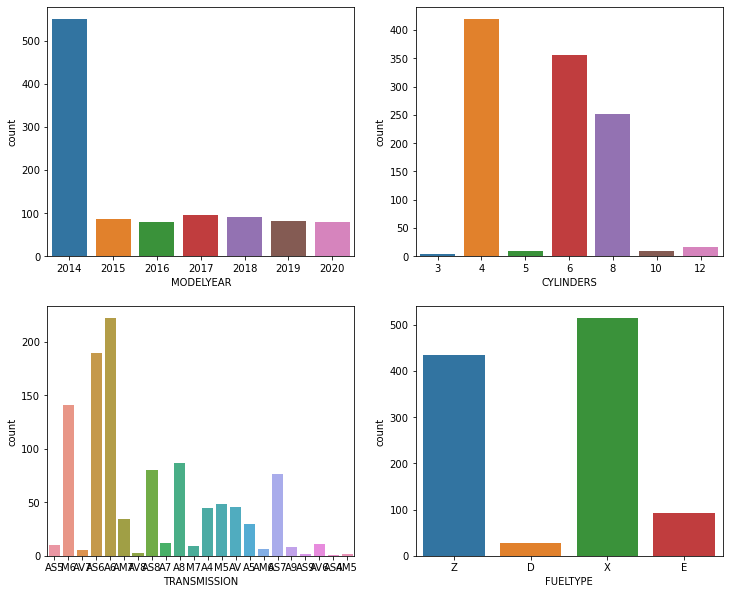

In [9]:
val_fig = plt.figure(num='value counts', figsize=(12.1, 10.1))
plt.subplot(2, 2, 1)
sns.countplot(df['MODELYEAR'])
plt.subplot(2, 2, 2)
sns.countplot(df['CYLINDERS'])
plt.subplot(2, 2, 3)
sns.countplot(df['TRANSMISSION'])
plt.subplot(2, 2, 4)
sns.countplot(df['FUELTYPE'])
plt.show()

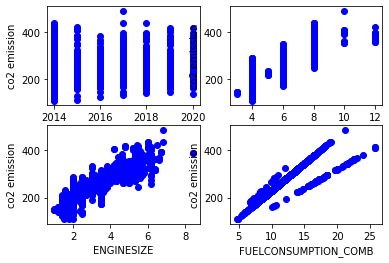

In [10]:
plt.subplot(2, 2, 1)
plt.scatter(df['MODELYEAR'], df['CO2EMISSIONS'], c='blue')
plt.xlabel('MODELYEAR')
plt.ylabel('co2 emission')
plt.subplot(2, 2, 2)
plt.scatter(df['CYLINDERS'], df['CO2EMISSIONS'], c='blue')
plt.xlabel('CYLINDERS')
plt.ylabel('co2 emission')
plt.subplot(2, 2, 3)
plt.scatter(df['ENGINESIZE'], df['CO2EMISSIONS'], c='blue')
plt.xlabel('ENGINESIZE')
plt.ylabel('co2 emission')
plt.subplot(2, 2, 4)
plt.scatter(df['FUELCONSUMPTION_COMB'], df['CO2EMISSIONS'], c='blue')
plt.xlabel('FUELCONSUMPTION_COMB')
plt.ylabel('co2 emission')
plt.show()

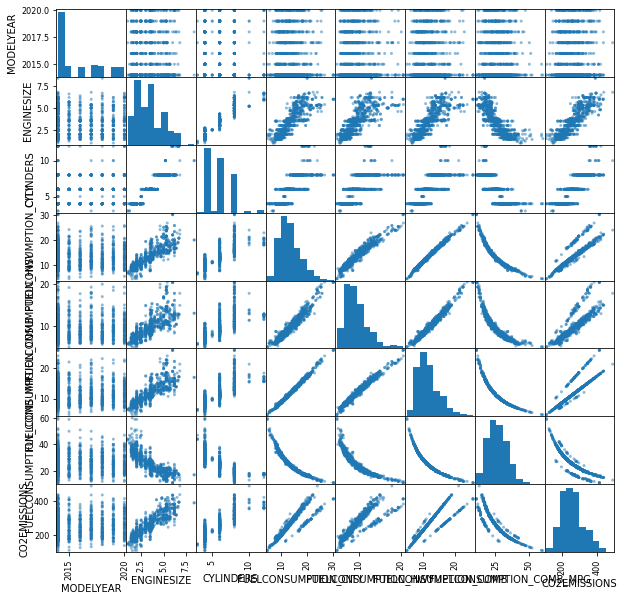

In [11]:
f_df = pd.DataFrame(df, columns=df.keys())
pd.plotting.scatter_matrix(f_df,  figsize=(10, 10))
plt.show()

## create a simple linear regression model

In [12]:
slr_model = np.asarray(df[['ENGINESIZE', 'CO2EMISSIONS']])
x = slr_model[:, 0]
y = slr_model[:, 1]
# np.random.shuffle(x)
# np.random.shuffle(y)

### pre processing

In [13]:
x = x - np.mean(x)
y = y - np.mean(y)

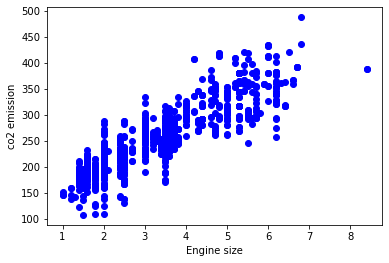

In [14]:
# plotting the new data
plt.scatter(slr_model[:, 0], slr_model[:, 1], c='blue')
plt.xlabel('Engine size')
plt.ylabel('co2 emission')
plt.show()

### split train and test (3 approaches)

In [15]:
index = int(.8 * len(slr_model))
# custom approach
train = slr_model[0: index]
test = slr_model[index:]
train_x, train_y, test_x, test_y = train[:, 0].reshape(
    -1, 1), train[:, 1].reshape(-1, 1), test[:, 0].reshape(-1, 1), test[:, 1].reshape(-1, 1)

# train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

# k-fold cross validation
k = KFold(5, shuffle=True)
k1, k2, k3, k4, k5 = k.split(x, y)

### learn / performance

#### using Scikit-learn

In [16]:
clf = LinearRegression()
clf.fit(train_x, train_y)
p = clf.predict(test_x)
print('coefficients : {} '.format((clf.coef_, clf.intercept_)))

coefficients : (array([[38.79512384]]), array([127.16989951])) 


In [18]:
funcs.loss_MSE(train_x, train_y, np.array([[127.16989951], [38.79512384]]))

997.4527342063876

In [19]:
print(r2_score(test_y, p))

0.7861345372905517


#### using own approach

In [20]:
funcs.gradient_descent(train_x, train_y, np.random.randn(
    2, 1), learning_rate=.099, max_iter=400)

End of the algorithm at iteration number 385.
The differences in costs was less than 0.001


(array([[126.6985091 ],
        [ 38.91390893]]),
 997.4872250490243)

In [21]:
funcs.loss_MSE(train_x, train_y, np.array([[126.70092286], [38.91330069]]))

997.4859204450299

In [22]:
Pred = funcs.Hyp(test_x, np.array([[126.16989951], [38.91330069]]))
r2_score(test_y, Pred)

0.7875512107986213

### plotting the hypothesis function

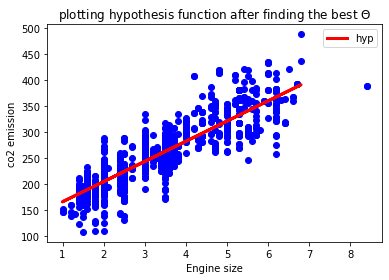

In [23]:
hyp = train_x * clf.coef_[0, 0] + clf.intercept_
plt.title('plotting hypothesis function after finding the best $ \Theta $')
plt.plot(train_x, hyp, label='hyp', linewidth=3, color='red')
plt.scatter(slr_model[:, 0], slr_model[:, 1], c='blue')
plt.xlabel('Engine size')
plt.ylabel('co2 emission')
plt.legend()
plt.show()

### estimating a new car co2 emission

In [24]:
eng = float(input('Enter an Egine size:'))
clf.intercept_ = clf.intercept_.reshape(1, 1)
predicted = eng * clf.coef_ + clf.intercept_
print('''estimated co2 emission for a car with engine size '{}' is: \n{} '''.format(
    eng, predicted[0, 0]))

Enter an Egine size:2
estimated co2 emission for a car with engine size '2.0' is: 
204.76014718093245 


### create a multiple linear regression

In [25]:
mlr_model = df[['ENGINESIZE', 'CYLINDERS',
                'FUELCONSUMPTION_COMB', 'CO2EMISSIONS']]
X = np.asarray(mlr_model[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB']])
Y = np.asarray(mlr_model[['CO2EMISSIONS']])
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25)

In [26]:
CLF = LinearRegression()
CLF.fit(X_train, Y_train)
p = CLF.predict(X_test)
print('coefficients : {} '.format((CLF.coef_, CLF.intercept_)))

coefficients : (array([[9.69157367, 8.7888126 , 9.63902179]]), array([60.66791639])) 


In [27]:
print(r2_score(Y_test, p))

0.863787748868337


In [28]:
eng, cyl, fue = float(input('Step 1 of 3 :\nEnter an Egine size:')), float(input(
    'Step 2 of 3: \nEnter number of cylinders:')), float(input('Step3 of 3: \nEnter FUELCONSUMPTION_COMB:'))
CLF.intercept_ = CLF.intercept_.reshape(1, 1)
predicted = (np.array([[eng, cyl, fue]]) * clf.coef_) + clf.intercept_
print('''estimated co2 emission for the car is: \n{} '''.format(
    predicted[0, 0]))

Step 1 of 3 :
Enter an Egine size:2
Step 2 of 3: 
Enter number of cylinders:4
Step3 of 3: 
Enter FUELCONSUMPTION_COMB:8.5
estimated co2 emission for the car is: 
204.76014718093245 
